In [44]:
%matplotlib inline 
%autosave 30
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

Autosaving every 30 seconds


# reillis rendre

In [45]:
numeroetudiant=11310840
a=0
b=8
c=4
d=0

In [46]:
def lecture_treillis(nom_fichier):
    F=open(nom_fichier,"r")

    F.readline()
    L=F.readline().split()
    Ne=int(L[0])                    #nombre de noeds
    Nb=int(L[1])                    #nombre de barre
    X=np.zeros((Ne,2))              #position
    CL=np.zeros((Ne),dtype=int)     #condition limite
    FA=np.zeros((2*Ne))             #force applique
    G=np.zeros((Nb,2),dtype=int)    #barres entre les noeds
    NA=np.zeros((Nb,3))             #nature des barres

    F.readline()
    for i in range(Ne):
        L=F.readline().split()
        X[i,0]=L[0]
        X[i,1]=L[1]
        CL[i]=L[2]
        FA[2*i]=L[3]
        FA[2*i+1]=L[4]
    
    F.readline()
    for i in range(Nb):
        L=F.readline().split()
        G[i,0]=L[0]
        G[i,1]=L[1]

    F.readline()
    for i in range(Nb):
        L=F.readline().split()
        NA[i,0]=L[0]
        NA[i,1]=L[1]
        NA[i,2]=L[2]
    
    return X,CL,FA,G,NA,Ne,Nb

In [47]:
X,CL,FA,G,NA,Ne,Nb=lecture_treillis("ZHANG_Xunjie_treillis_rendre.txt")

In [48]:
def trace_treillis(X,G):
    plt.ylim(-1.,3.0)
    plt.xlim(-1.,5.0)
    for i in range(len(G)):
        x1=X[G[i,0]-1,0]
        x2=X[G[i,1]-1,0]
        y1=X[G[i,0]-1,1]
        y2=X[G[i,1]-1,1]
    
        plt.plot([x1,x2],[y1,y2],marker='o',color='b',linewidth=2.0)        

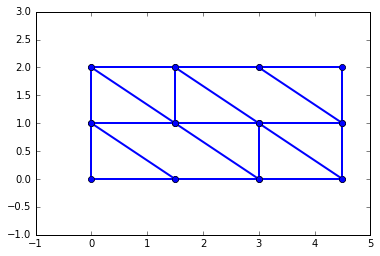

In [49]:
trace_treillis(X,G)

In [50]:
def assemblage(X,CL,FA,G,NA,Ne,Nb):
    R=np.zeros((2,2))
    T=np.zeros((4,4))
    Ke=np.zeros((4,4))
    Me=np.zeros((4,4))
    Mt=np.zeros((2*Ne,2*Ne))  
    K=np.zeros((2*Ne,2*Ne))                         #2*Ne,2*Ne
    
    for i in range(len(G)):
        angle=[]                                    #sin cos
        x1=X[G[i][0]-1][0]
        x2=X[G[i][1]-1][0]
        y1=X[G[i][0]-1][1]
        y2=X[G[i][1]-1][1]
        L=np.sqrt((x2-x1)**2+(y2-y1)**2)           #longeur de barre
        angle.append((y2-y1)/L)
        angle.append((x2-x1)/L)
        R[0,0]=angle[1]
        R[0,1]=angle[0]
        R[1,0]=-angle[0]
        R[1,1]=angle[1]
        T[:2,:2]=R
        T[2:,2:]=R
        Ke[0,0]=NA[i,0]*NA[i,1]/L                   #Ke
        Ke[2,2]=NA[i,0]*NA[i,1]/L
        Ke[0,2]=-NA[i,0]*NA[i,1]/L
        Ke[2,0]=-NA[i,0]*NA[i,1]/L                 
        Me[0,0]=NA[i,2]*NA[i,1]*L/3                 #Me
        Me[2,2]=NA[i,2]*NA[i,1]*L/3
        Me[0,2]=-NA[i,2]*NA[i,1]*L/6
        Me[2,0]=-NA[i,2]*NA[i,1]*L/6
        M=np.dot(np.dot(T.transpose(),Ke),T)
        Mm=np.dot(np.dot(T.transpose(),Me),T)
        k=G[i][0]-1
        j=G[i][1]-1
        indice=[2*k,2*k+1,2*j,2*j+1]
  
        for n in range(4):
            for m in range(4):
                K[indice[n],indice[m]]=K[indice[n],indice[m]]+M[n,m]
                Mt[indice[n],indice[m]]=Mt[indice[n],indice[m]]+Mm[n,m]
             
    for i in range(len(CL)) :
        
        if CL[i]==3:
            K[2*i,:]=0.
            K[2*i,2*i]=1.
            K[2*i+1,:]=0.
            K[2*i+1,2*i+1]=1.
            Mt[2*i,:]=0.
            Mt[2*i,2*i]=1.
            Mt[2*i+1,:]=0.
            Mt[2*i+1,2*i+1]=1.
            
        elif CL[i]==2:
            K[2*i+1,:]=0.
            K[2*i+1,2*i+1]=1.
            Mt[2*i+1,:]=0.
            Mt[2*i+1,2*i+1]=1.
            
        elif CL[i]==1:
            K[2*i,:]=0.
            K[2*i,2*i]=1.
            Mt[2*i,:]=0.
            Mt[2*i,2*i]=1.
            
            
    U=np.linalg.solve(K,FA)
    A=np.dot(np.linalg.inv(Mt),K)
    
    return U,A

In [51]:
U,A=assemblage(X,CL,FA,G,NA,Ne,Nb)

In [52]:
def save_res(nom_fichier,U):
    F=open(nom_fichier,"w")
    Nn=np.shape(U)[0]/2
    np.savetxt(F,np.reshape(U,(Nn,2)))
    F.close()
    return
save_res("deformation.txt",U)

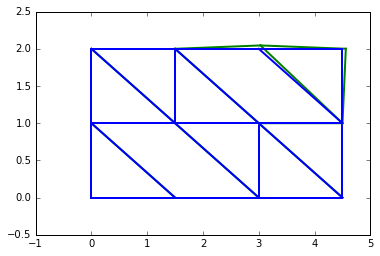

In [53]:
F=open("deformation.txt","r")
Xx=np.zeros((Ne,2))
for i in range(Ne):
    L=F.readline().split()
    Xx[i,0]=L[0]
    Xx[i,1]=L[1]
Xx=Xx+X
for i in range(Nb):
    x1=Xx[G[i,0]-1,0]
    x2=Xx[G[i,1]-1,0]
    y1=Xx[G[i,0]-1,1]
    y2=Xx[G[i,1]-1,1]
    u1=X[G[i,0]-1,0]
    u2=X[G[i,1]-1,0]
    v1=X[G[i,0]-1,1]
    v2=X[G[i,1]-1,1]
    plt.plot([x1,x2],[y1,y2],color='g',linewidth=2.0)
    plt.plot([u1,u2],[v1,v2],color='b',linewidth=2.0)
#plt.savefig('deforme.png')

In [54]:
D,V=np.linalg.eig(A)       #etude dynamique
print D#,V                 #w²

[  9.32733471e+04 +0.00000000e+00j   8.42059843e+04 +0.00000000e+00j
   8.35321829e+04 +0.00000000e+00j   5.75649079e+04 +0.00000000e+00j
   3.96636640e+03 +0.00000000e+00j   9.13909229e+03 +0.00000000e+00j
   1.27723637e+04 +0.00000000e+00j   1.51821770e+04 +0.00000000e+00j
   2.29594262e+04 +0.00000000e+00j   4.04675854e+04 +0.00000000e+00j
   3.80447001e+04 +0.00000000e+00j   2.74744128e+04 +0.00000000e+00j
   3.55534340e+04 +0.00000000e+00j   3.32861758e+04 +0.00000000e+00j
   3.17014660e+04 +0.00000000e+00j   3.13117480e+04 +0.00000000e+00j
   1.00000000e+00 +0.00000000e+00j   1.53717333e+04 +0.00000000e+00j
   4.27889355e+04 +0.00000000e+00j   1.00000000e+00 +0.00000000e+00j
   1.00000000e+00 +1.61167624e-12j   1.00000000e+00 -1.61167624e-12j
   1.00000000e+00 +0.00000000e+00j   1.00000000e+00 +0.00000000e+00j]
